Prep work:

*   Download student csv predictions from I-Learn
*   Rename files to team8-module3-predictions.csv where team8 is the name of the team
*   Make sure file is one column and remove any extra columns
*   Make sure the heading is set to "price" (without quotes)
*   Upload student csv predictions to session storage area.
*   Upload module3-holdout-answers.csv found in the Canvas module (DO NOT SHARE THIS FILE)
*   Run the notebook






In [ ]:
# MODULE 03 - HOUSING HOLDOUT GRADING

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# THESE DETERMINE THE AUTO GRADER PARAMETER AND RANGES FOR 100 AND 0
grading_criteria = 'R2'
level_for_top_score = .89
level_for_bottom_score = .81

# READ IN THE CSV FILES
team_dir = Path("./")
teams = team_dir.glob("*-predictions.csv")
team_list = []
for team in teams:
  # print(latent_file)
  team_list.append((str(team).split("-",1)[0],team))

# print(team_list)

In [ ]:
# READ IN THE HOLDOUT ANSWERS
targets_file = "module3-holdout-answers.csv"
targets = pd.read_csv(targets_file)
# targets

In [ ]:
# ARE THE STUDENT DATASETS THE CORRECT LENGTH
student_datasets = {}
for (group, file) in team_list:
  ds = pd.read_csv(file)
  
  if ds.shape != targets.shape:
    if ds.shape[1] == 2 and ds.shape[0] == targets.shape[0]:
      ds = ds.drop(ds.columns[[0]],axis = 1)
      student_datasets[group] = ds
      print(f"Group {group} added successfully after removing extra index column")      
    else:
      print(f"Error group {group} ds had {ds.shape} rows and columns instead of the expected {targets.shape}. It will be excluded.")
  else:
    student_datasets[group] = ds
    print(f"Group {group} added successfully")

Group team7 added successfully
Group team4 added successfully
Error group team8 ds had (1613, 18) rows and columns instead of the expected (1613, 1). It will be excluded.
Group team3 added successfully
Group team5 added successfully
Group team9 added successfully
Group team1 added successfully
Group team10 added successfully


In [ ]:
# student_datasets

In [ ]:
def recommended_grade(amount):
  '''
  A simple min max scaler to identify a recommended score for the holdout set
  '''
  min_allowed = level_for_bottom_score
  max_allowed = level_for_top_score
  if amount>max_allowed:
    return 100
  elif amount<min_allowed:
    return 0
  else:
    return (amount - min_allowed) / (max_allowed - min_allowed)*100
    

In [ ]:
results_dict = {}

In [ ]:
for group, student_ds in student_datasets.items():
  student_dict = {}
  # print(group,cm)
  student_ds.columns=['price']  
  mse = root_mean_squared_error(targets, student_ds)
  # print("{} - RMSE: {}".format(group, mse))

  student_dict["RMSE"] = root_mean_squared_error(targets, student_ds)
  student_dict["Mean Abs Error"] = mean_absolute_error(targets, student_ds)
  student_dict["Median Abs Error"] = median_absolute_error(targets, student_ds)
  student_dict["R2"] = r2_score(targets, student_ds)

  combined = pd.concat([targets, student_ds], axis=1)
  combined.columns = ["target", "pred"]
  combined["absdiff"] = (combined["target"] - combined["pred"]).abs()
  combined["absdiff_pct"] = combined["absdiff"] / combined["target"]

  shower = pd.DataFrame(student_ds, columns = ['price'])
  shower.columns = ['predictions']
  testfinal = pd.concat([shower,targets['price']],axis=1)
  testfinal['difference'] = testfinal['price']-testfinal['predictions']
  testfinal['percent_difference'] = abs(testfinal['difference']/testfinal['price'])
  testfinal['percent_bucket'] = [ "above 20%" if i >= 0.2 else "below 20%" for i in testfinal.percent_difference ]
 
  # testfinal

  student_dict['dataset'] = testfinal
  percents = [5, 10, 20]
  for percent in percents:
    student_dict[f"Percent of houses within {percent} percent"] = len(combined[combined["absdiff_pct"] <= (percent /100)]) / len(combined) * 100
  student_dict["Grade"] = recommended_grade(student_dict[grading_criteria])

  results_dict[group] = student_dict

In [ ]:
# df['predictions']

In [ ]:
# results_dict

In [ ]:
results_df = pd.DataFrame(results_dict)
results_ds_trans = results_df.transpose()
results_ds_trans = results_ds_trans.drop(columns=["Grade"])
results_ds_trans = results_ds_trans.drop(columns=["dataset"])

results_ds_trans = results_ds_trans.round(2)
results_ds_trans = results_ds_trans.sort_values(by="R2",ascending=False)


In [ ]:
# results_df

-------------------------------- TEAM7 RESULTS ---------------------------------

 Within 5%: 33.04401735895846%
 Within 10%: 57.34655920644761%
 Within 20%: 82.70303781773094%
 R^2: 0.8878546714742598%
 RMSE: 125757.41843758262
 Mean Absolute Error: 67115.24201029137
 Median Aboslute Error: 36802.53460000001


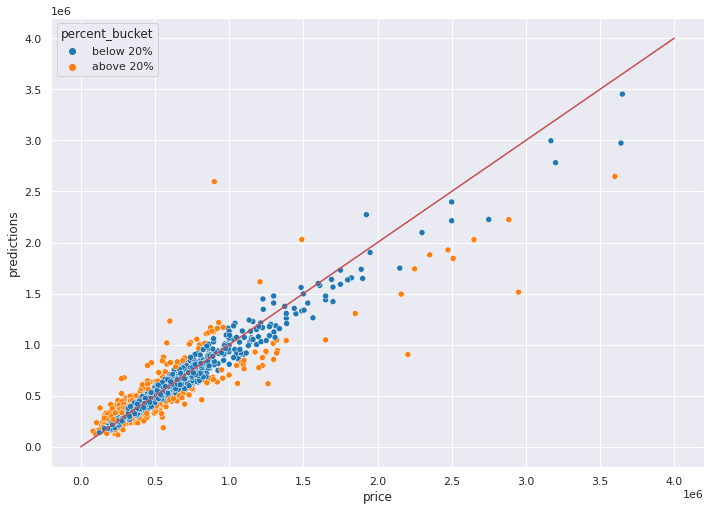

-----------------------------------------------------------------------------




-------------------------------- TEAM4 RESULTS ---------------------------------

 Within 5%: 26.286422814631123%
 Within 10%: 48.41909485430874%
 Within 20%: 78.05331680099195%
 R^2: 0.8543554069986047%
 RMSE: 143314.52312202306
 Mean Absolute Error: 78273.67885926845
 Median Aboslute Error: 48578.060000000056


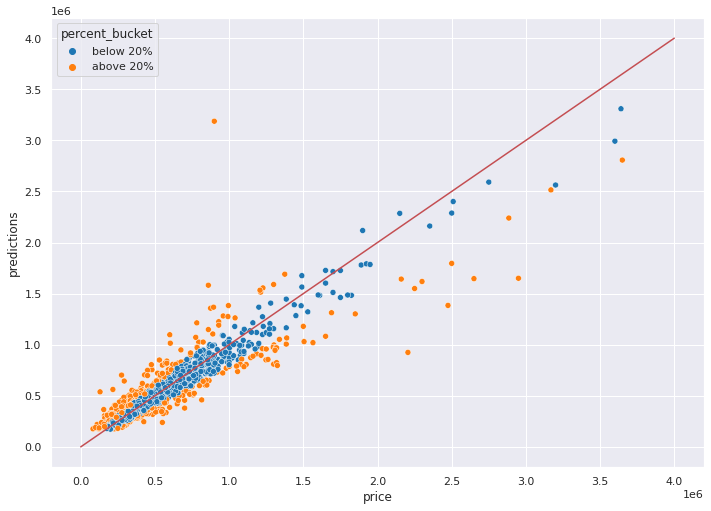

-----------------------------------------------------------------------------




-------------------------------- TEAM3 RESULTS ---------------------------------

 Within 5%: 10.477371357718537%
 Within 10%: 21.512709237445755%
 Within 20%: 45.071295722256664%
 R^2: 0.560528409606315%
 RMSE: 248947.87439706232
 Mean Absolute Error: 149172.2828518289
 Median Aboslute Error: 117339.30000000005


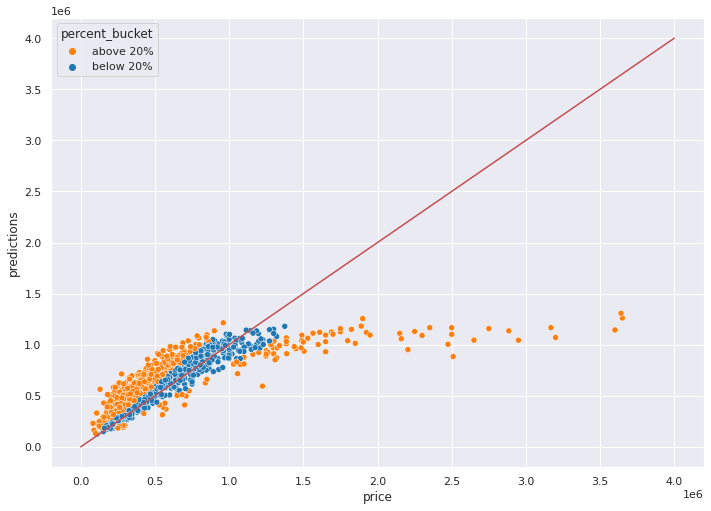

-----------------------------------------------------------------------------




-------------------------------- TEAM5 RESULTS ---------------------------------

 Within 5%: 28.456292622442653%
 Within 10%: 50.40297582145071%
 Within 20%: 77.92932424054557%
 R^2: 0.87499390631817%
 RMSE: 132772.64646560414
 Mean Absolute Error: 74266.67903905765
 Median Aboslute Error: 44518.159999999974


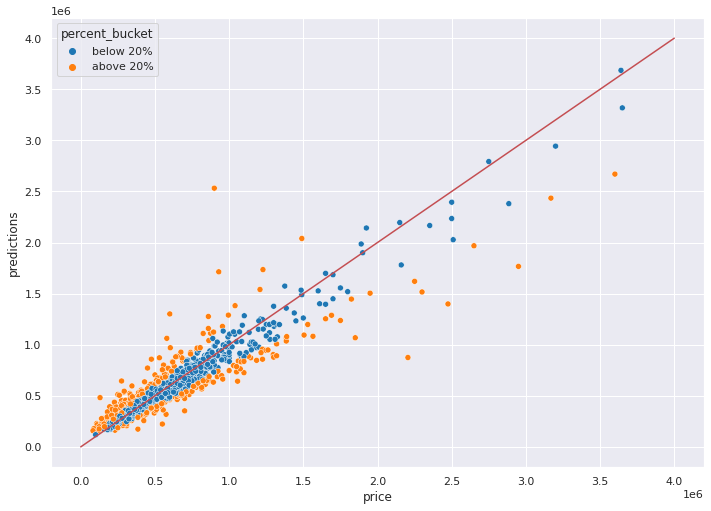

-----------------------------------------------------------------------------




-------------------------------- TEAM9 RESULTS ---------------------------------

 Within 5%: 31.43211407315561%
 Within 10%: 55.67265964042157%
 Within 20%: 80.90514569125853%
 R^2: 0.8795267517159345%
 RMSE: 130343.18527473739
 Mean Absolute Error: 69339.81887786732
 Median Aboslute Error: 39674.25


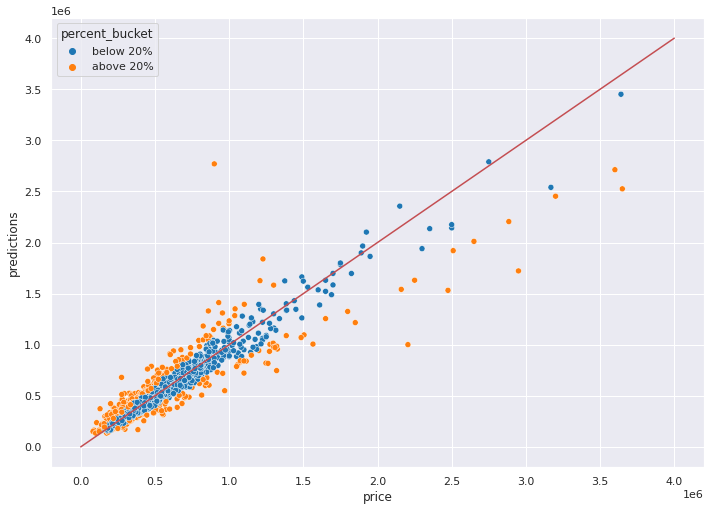

-----------------------------------------------------------------------------




-------------------------------- TEAM1 RESULTS ---------------------------------

 Within 5%: 30.00619962802232%
 Within 10%: 54.30874147551147%
 Within 20%: 80.53316800991941%
 R^2: 0.8901725008060198%
 RMSE: 124451.0505733143
 Mean Absolute Error: 70842.48117544947
 Median Aboslute Error: 40544.75


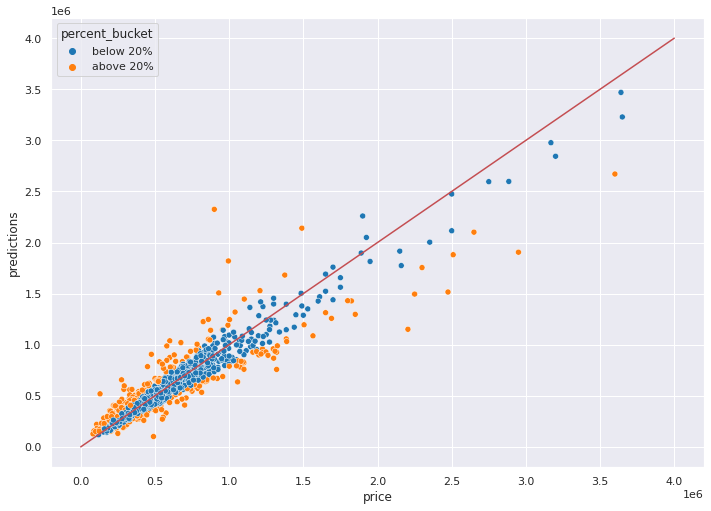

-----------------------------------------------------------------------------




-------------------------------- TEAM10 RESULTS ---------------------------------

 Within 5%: 29.820210787352757%
 Within 10%: 53.06881587104774%
 Within 20%: 81.9590824550527%
 R^2: 0.895551649820979%
 RMSE: 121365.09830380256
 Mean Absolute Error: 69193.47994301922
 Median Aboslute Error: 40963.348


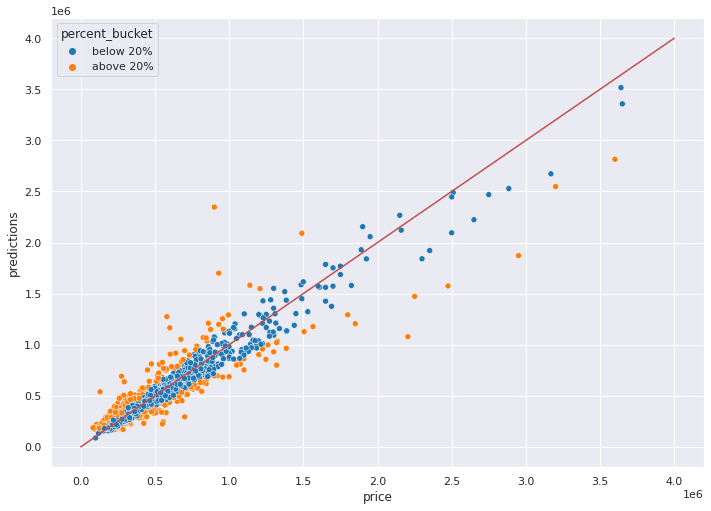

-----------------------------------------------------------------------------






In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
for team_results in results_dict.items():
  testfinal = team_results[1]['dataset']
  # print(team_results['dataset'])
  # print(f"R-Squared Value: {r2}")
  print(f"-------------------------------- {team_results[0].upper()} RESULTS ---------------------------------\n")
  print(f" Within 5%: {team_results[1]['Percent of houses within 5 percent']}%\n",
  f"Within 10%: {team_results[1]['Percent of houses within 10 percent']}%\n",
  f"Within 20%: {team_results[1]['Percent of houses within 20 percent']}%\n",
  f"R^2: {team_results[1]['R2']}%\n",
  f"RMSE: {team_results[1]['RMSE']}\n",
  f"Mean Absolute Error: {team_results[1]['Mean Abs Error']}\n",
  f"Median Aboslute Error: {team_results[1]['Median Abs Error']}")


  color_dict = dict({'below 20%':'tab:blue',
                    'above 20%': 'tab:orange'})
  # print(testfinal['abspercentmiss'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95]))
  xlims=(0,4e6)
  ylims=(0,4e6)
  ax = sns.scatterplot(data=testfinal,x='price',y='predictions',hue="percent_bucket",palette=color_dict)
  # ax.set(xscale="log", yscale="log", xlim=xlims, ylim=ylims)
  ax.plot(xlims,xlims, color='r')
  # plt.legend(labels=['perfect',"below 5",'above 5','10-20%','above 20'])  
  plt.show()
  print(f"-"*77)
  print("\n"*3)


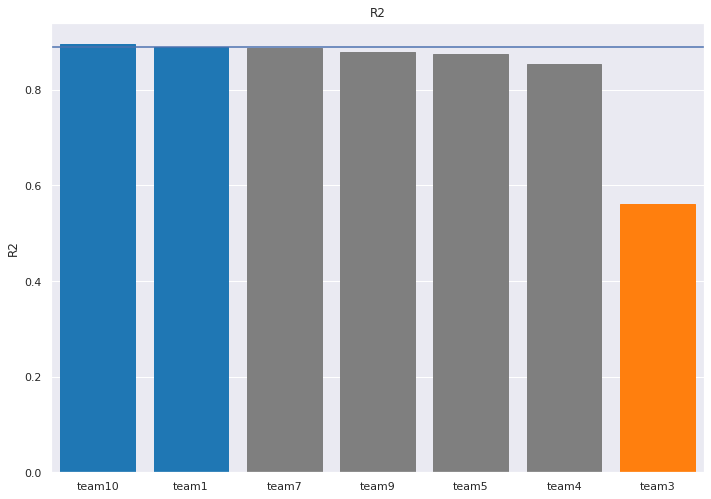

,RMSE,Mean Abs Error,Median Abs Error,R2,Percent of houses within 5 percent,Percent of houses within 10 percent,Percent of houses within 20 percent,Grade
team10,121365,69193.5,40963.3,0.895552,29.8202,53.0688,81.9591,100
team1,124451,70842.5,40544.8,0.890173,30.0062,54.3087,80.5332,100
team7,125757,67115.2,36802.5,0.887855,33.044,57.3466,82.703,97.3183
team9,130343,69339.8,39674.2,0.879527,31.4321,55.6727,80.9051,86.9084
team5,132773,74266.7,44518.2,0.874994,28.4563,50.403,77.9293,81.2424
team4,143315,78273.7,48578.1,0.854355,26.2864,48.4191,78.0533,55.4443
team3,248948,149172,117339,0.560528,10.4774,21.5127,45.0713,0


In [ ]:
# GENERATE GRAPHICS FOR TEAMS 
# THESE CAN BE SHARED WITH THE STUDENTS

graph = sns.barplot(data=results_ds_trans,y=grading_criteria,x=results_ds_trans.index)
graph.set_title(grading_criteria)
graph.axhline(level_for_top_score)
for bar in graph.patches:
    if bar.get_height() >= level_for_top_score:
        bar.set_color('tab:blue') 
    elif bar.get_height() <0:
      bar.set_color('tab:red')         
    elif bar.get_height() < level_for_bottom_score:
      bar.set_color('tab:orange')  
    else:
        bar.set_color('tab:grey')
#The plot is shown
plt.show()
results_ds_trans

In [ ]:
results_ds_trans = results_df.transpose()

results_ds_trans = results_ds_trans.drop(columns=["dataset"])
results_ds_trans = results_ds_trans.sort_values(by=grading_criteria,ascending=False)
results_ds_trans.to_csv("class_results.csv")
results_ds_trans

,RMSE,Mean Abs Error,Median Abs Error,R2,Percent of houses within 5 percent,Percent of houses within 10 percent,Percent of houses within 20 percent,Grade
team10,121365,69193.5,40963.3,0.895552,29.8202,53.0688,81.9591,100
team1,124451,70842.5,40544.8,0.890173,30.0062,54.3087,80.5332,100
team7,125757,67115.2,36802.5,0.887855,33.044,57.3466,82.703,97.3183
team9,130343,69339.8,39674.2,0.879527,31.4321,55.6727,80.9051,86.9084
team5,132773,74266.7,44518.2,0.874994,28.4563,50.403,77.9293,81.2424
team4,143315,78273.7,48578.1,0.854355,26.2864,48.4191,78.0533,55.4443
team3,248948,149172,117339,0.560528,10.4774,21.5127,45.0713,0
